# Build classifier with BoW vectorizer and Linear SVC

### 0. Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### 1. Load the preprocessed train and test data 

In [2]:
df_training = pd.read_pickle(r'..\data\df_training_clean.pkl')
df_testing = pd.read_pickle(r'..\data\df_testing_clean.pkl')

### 2. Define, vectorize and split the data

#### 2.1 Define X and y from training dataframe

In [3]:
# We'll use the 'lemmatized_str' column for features and 'label' for target

X = df_training['lemmatized_str']
y = df_training['label']

#### 2.2 Vectorize the selected features

In [4]:
# Vectorize lemmatized headlines using Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

#### 2.3 Split into train and validation sets

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_bow, y, test_size=0.2, random_state=42)


### 3. Initialize and train Logistic Regression

In [6]:
# Initialize the model
svc = LinearSVC(C=1.0, max_iter=1000, random_state=42)

# Fit the model on the training data
svc.fit(X_train, y_train)

LinearSVC(random_state=42)

### 4. Model evaluation

#### 4.1 Make predictions on validation set

In [7]:
y_pred = svc.predict(X_val)

#### 4.2 Calculate and print accuracy metrics

In [8]:
accuracy_svc = accuracy_score(y_val, y_pred)
print(f"Logistic Regression Validation Accuracy: {accuracy_svc:.4f}")
print(classification_report(y_val, y_pred))

Logistic Regression Validation Accuracy: 0.9260
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3233
           1       0.93      0.92      0.93      3209

    accuracy                           0.93      6442
   macro avg       0.93      0.93      0.93      6442
weighted avg       0.93      0.93      0.93      6442



### 5. Plotting the results

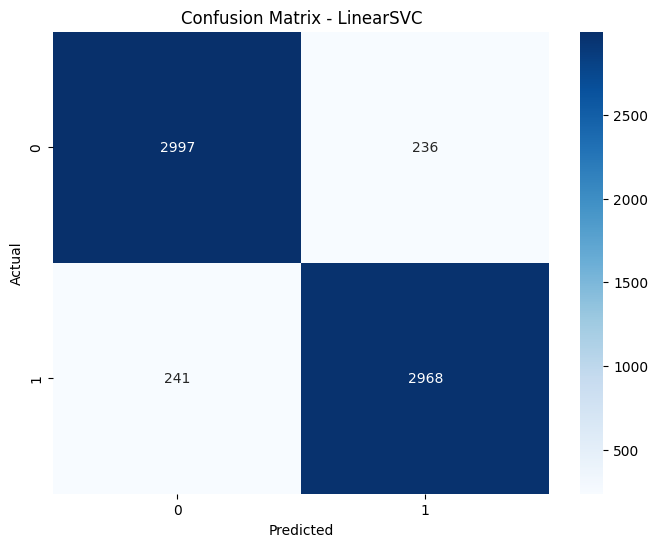

C:\Users\jefit\AppData\Local\Temp\ipykernel_15440\3272933067.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='viridis')


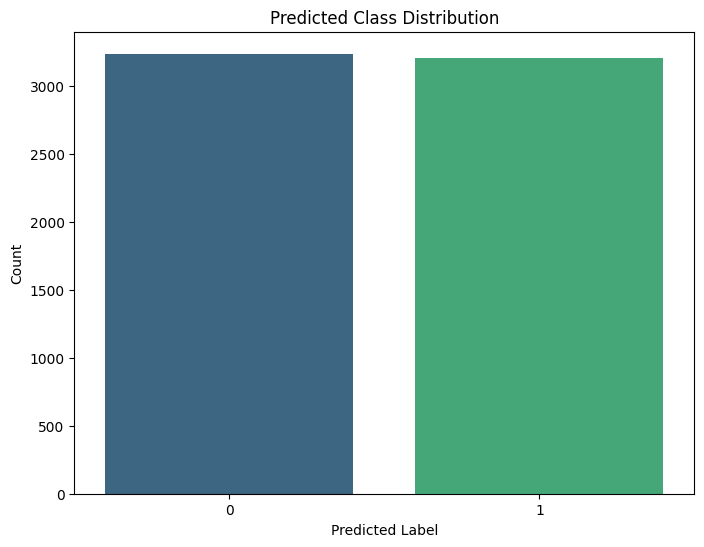

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LinearSVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar plot of predicted class distribution
plt.figure(figsize=(8,6))
sns.countplot(x=y_pred, palette='viridis')
plt.title('Predicted Class Distribution')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.show()